# Problem Statement:
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.

Objective: To predict the total sales generated from all the sales channel.

In [163]:
#importing the lib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Data Exploration/Analysis

In [6]:
#importing csv file 
#checking top 5 rows

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
#checking last 5 rows

df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
df.sample()

,Unnamed: 0,TV,radio,newspaper,sales
16,17,67.8,36.6,114.0,12.5


Observations: In the above cell, we can see the first five and last five entries of our dataset and as per the problem statement the column "sales" is our target attribute for prediction making the other columns our feature attributes. Also,looking at the unnamed column one can say that it is useless in terms of contributing to any data and removing it will be better for our model.

Considering how we have continous data present in our target column,this makes it a Regression problem

In [17]:
#Droping column 'unnames'

df.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [19]:
#checking shape

df.shape

(200, 4)

In [20]:
#checking name of columns

df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [21]:
#checking datatype

df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [22]:
#checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
#checking null values
#no null values found
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

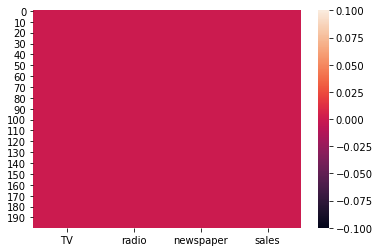

In [24]:
#heatmap for null values

sns.heatmap(df.isnull())

# Statistical Analysis

In [25]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Remarks:

count for all the columns are same, so, no data is missing.

Large difference between 75th percentile and max is present in newspaper. while the other two feature columns show reasonable increase between each of their quantiles

# Exploratory Data Analysis (EDA):
    
Univariate Analysis

<AxesSubplot:xlabel='sales', ylabel='Density'>

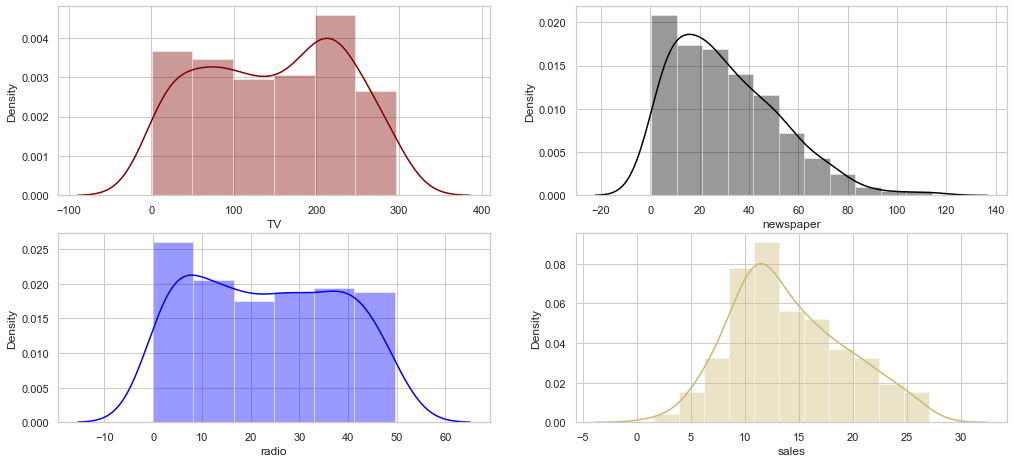

In [43]:
#distribution plots



plt.figure(figsize=(17,16))
plt.subplot(4,2,1)
sns.distplot(df.TV,kde=True,color='maroon')
plt.subplot(4,2,2)
sns.distplot(df.newspaper,kde=True,color='black')
plt.subplot(4,2,3)
sns.distplot(df.radio,kde=True,color='blue')
plt.subplot(4,2,4)
sns.distplot(df.sales,kde=True,color='y')

<AxesSubplot:xlabel='TV', ylabel='Count'>

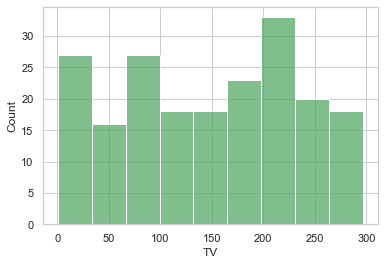

In [172]:
sns.histplot(df.TV,color='g')

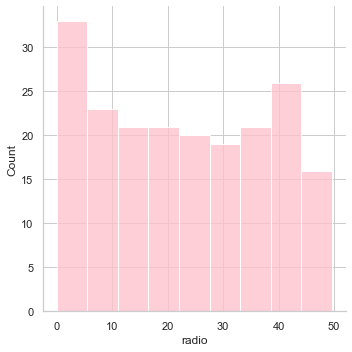

In [175]:
sns.displot(df.radio,color='pink')

Observation:

We can say sales is normally distributed

Newspaper is right skewed

TV and radio have is not normally distribution, so we have to normalize them.

# Bivariate Analysis

Text(0.5, 1.0, 'Sales vc Radio')

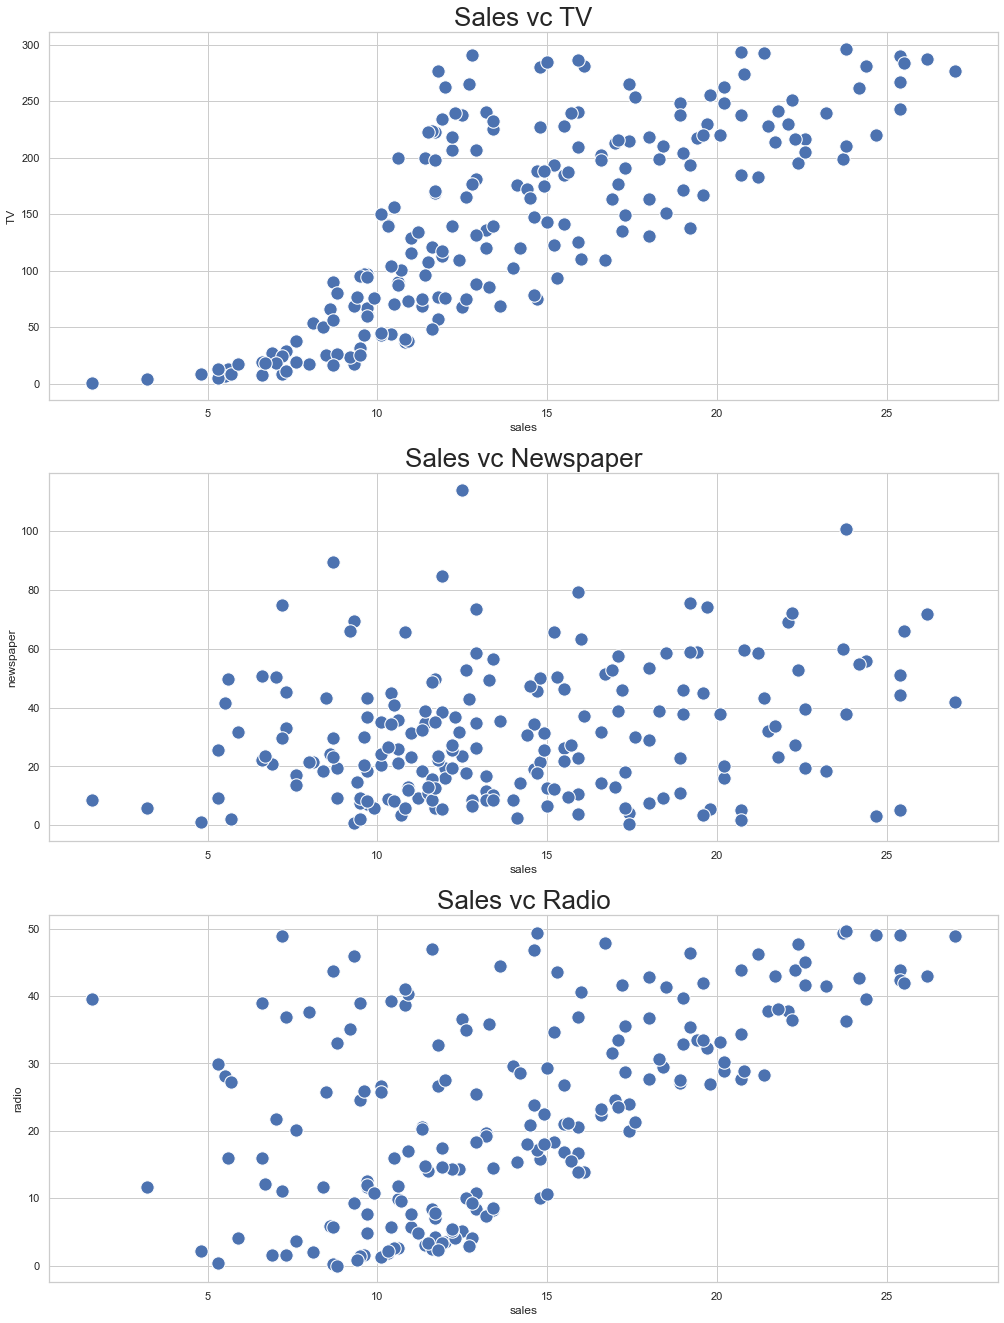

In [51]:
#scatterplot

plt.figure(figsize=(17,23))
plt.subplot(3,1,1)
sns.scatterplot(x='sales',y='TV',data=df,s=180)
plt.title('Sales vc TV',fontsize=26)
plt.subplot(3,1,2)
sns.scatterplot(x='sales',y='newspaper',data=df,s=180)
plt.title('Sales vc Newspaper',fontsize=26)
plt.subplot(3,1,3)
sns.scatterplot(x='sales',y='radio',data=df,s=180)
plt.title('Sales vc Radio',fontsize=26)


Observation:

Radio and TV shows linear relationship with sales as compared to newspaper which shows no such linear relationship 

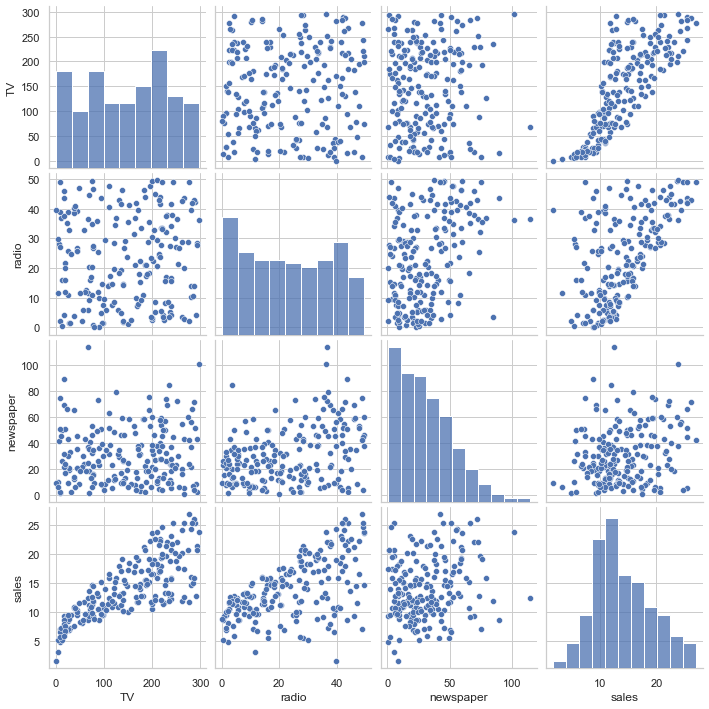

In [57]:
sns.pairplot(df)

Observation: From the above pairplot, we can see that TV and Radio columns have a linear relationship with Sales. However the Newspaper column is too scattered and we can see an increase with respect to sales but their is no definite linear pattern.

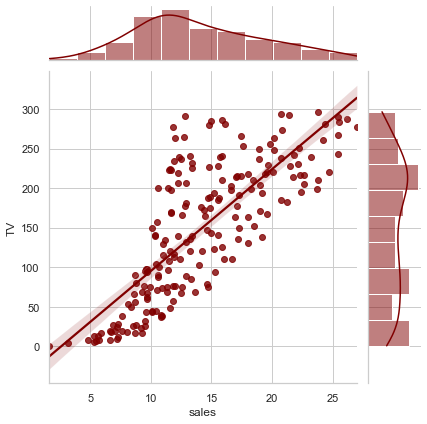

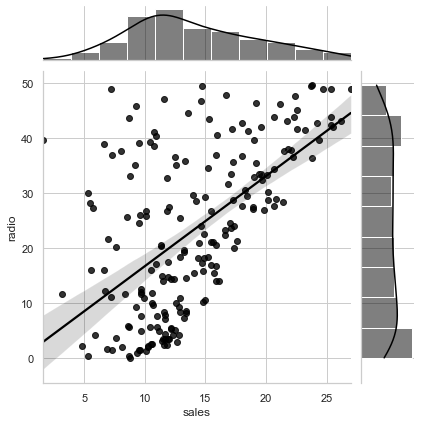

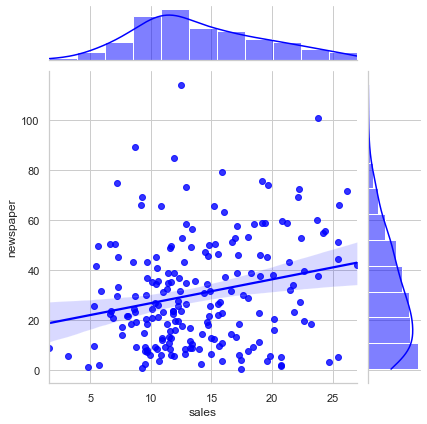

In [66]:
#joint plot

sns.jointplot(x='sales',y='TV',kind='reg',data=df,color='maroon')
sns.jointplot(x='sales',y='radio',data=df,kind='reg',color='black')
sns.jointplot(x='sales',y='newspaper',data=df,kind='reg',color='blue')

Observation: With the help of jointplot, we can see the distribution as well as the direction of sales whether it is positive or not. TV AND Radio is having a positive direction and as the value of TV and radio increasing, sales is also increasing.

# Multivariate Analysis
Checking correlation:

In [103]:
#dropping newspaper column

df.drop('newspaper',axis=1,inplace=True)

In [104]:
df.corr()

,TV,radio,sales
TV,1.000000,0.054809,0.782224
radio,0.054809,1.000000,0.576223
sales,0.782224,0.576223,1.000000


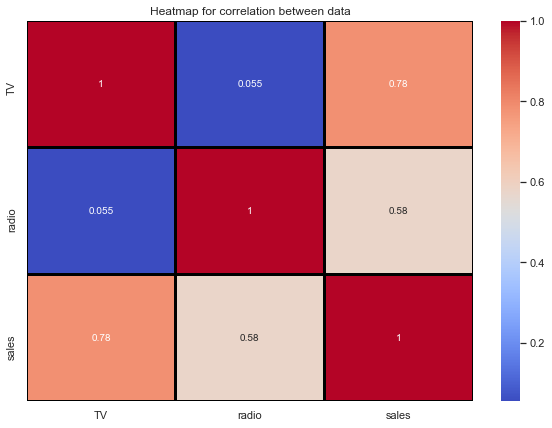

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=2,linecolor='black')
plt.title('Heatmap for correlation between data')
plt.show()

sales is high positive correlation with TV
newspaper have neg. correlation with tv

# Checking outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

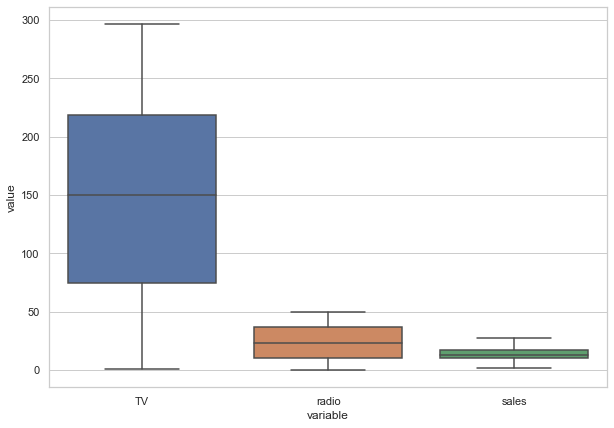

In [165]:
plt.figure(figsize=(10,7))
sns.boxplot(x='variable',y='value',data=pd.melt(df))

No outliers Present

# checking skewness

In [107]:
df.skew()

TV      -0.069853
radio    0.094175
sales    0.407571
dtype: float64

# preparing Data for Model

In [108]:
x=df.iloc[:,0:-1]
x.shape

(200, 2)

In [110]:
y=df.iloc[:,-1]
y.shape

(200,)

# Feature Engineering 

In [111]:
#scaling data using standarscaler

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

# spliting test data

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

# choosing Best Model

In [136]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
      KNeighborsRegressor(),SVR(),ExtraTreesRegressor(),AdaBoostRegressor(),
      GradientBoostingRegressor()]

for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\n')
    print('Error and R2 Score of',m,'is :''\n')
    print('Mean Absolute Error''\n',mean_absolute_error(y_test,predm))
    print('Mean Squared Error''\n',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error''\n',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')
    print('R2 SCORE --''\n',r2_score(y_test,predm))
    
     



Error and R2 Score of LinearRegression() is :

Mean Absolute Error
 1.2202594848060526
Mean Squared Error
 2.23495940986144
Root Mean Squared Error
 1.494978063337867


R2 SCORE --
 0.9223053625096076


Error and R2 Score of DecisionTreeRegressor() is :

Mean Absolute Error
 0.8633333333333335
Mean Squared Error
 1.183
Root Mean Squared Error
 1.0876580344942983


R2 SCORE --
 0.9588749774400456


Error and R2 Score of RandomForestRegressor() is :

Mean Absolute Error
 0.6705833333333323
Mean Squared Error
 0.6218844833333318
Root Mean Squared Error
 0.788596527594011


R2 SCORE --
 0.9783812228176088


Error and R2 Score of KNeighborsRegressor() is :

Mean Absolute Error
 0.7576666666666666
Mean Squared Error
 1.0275133333333333
Root Mean Squared Error
 1.0136633234626442


R2 SCORE --
 0.9642802121606193


Error and R2 Score of SVR() is :

Mean Absolute Error
 0.7455491069954205
Mean Squared Error
 1.3774349131909533
Root Mean Squared Error
 1.1736417311901248


R2 SCORE --
 0.9521

# cross validation

fro checking overfitting

In [150]:
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
cv=cross_val_score(lr,x,y,cv=5)
print('cross validaiton sccore for Linear model:',cv.mean())
print('\n')

dt=DecisionTreeRegressor()
cv=cross_val_score(dt,x,y,cv=5)
print('cross val score for DecisionTree model:',cv.mean())
print('\n')

rf=RandomForestRegressor()
cv=cross_val_score(rf,x,y,cv=5)
print('cross val score for RandomForestRegressor model:',cv.mean())
print('\n')

er=ExtraTreesRegressor()
cv=cross_val_score(er,x,y,cv=5)
print('cross val score for ExtraTreesRegressor model:',cv.mean())

cross validaiton sccore for Linear model: 0.889282957306453


cross val score for DecisionTree model: 0.9620287221439952


cross val score for RandomForestRegressor model: 0.9780895658889655


cross val score for ExtraTreesRegressor model: 0.9878871895165281


# Observation: We are getting good accuracy with ExtraTreesRegressor so we will do hyperparameter tuning of that model.

# Hyper parameter Tunnig
Hyper parameter tuning on the best ML Model:

In [151]:
from sklearn.model_selection import GridSearchCV

param={
    "bootstrap":[True,False],
    "max_depth":[1,2,3,4,None],
    "min_samples_leaf":[1,2,3,4,None],
    "min_samples_split":[1,2,3,4,None],
    "max_leaf_nodes":[1,2,3,4,None],
    "n_estimators":[100,200,300,400,500]
}

gcv=GridSearchCV(estimator=er,cv=5,n_jobs=-1,param_grid=param)
gcv.fit(x_train,y_train)
gcv.best_score_
gcv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

# Final model performance metrics:

In [157]:
er=ExtraTreesRegressor(bootstrap=False,
 max_depth=None,
 max_leaf_nodes=None,
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=200)
er.fit(x_train,y_train)
er.score(x_train,y_train)
pred=er.predict(x_test)
print('error')
print('Mean Absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('R2 SCORE :',r2_score(y_test,pred))

error
Mean Absolute Error 0.49584166666666124
Mean Squared Error 0.3399817791666618
Root Mean Squared Error 0.583079565039508


R2 SCORE : 0.9881811003058306


# Saving the model

In [159]:
import joblib
joblib.dump(gcv,'Advertising.obj')

['Advertising.obj']

# Load The Model:

In [161]:
model=joblib.load('Advertising.obj')
y_pred=model.predict(x_test)
r2_score(y_test,pred)

0.9881811003058306

In [162]:
pred_data=pd.DataFrame()
pred_data['Real_values']=y_test
pred_data['Predicted_by_model']=y_pred
pred_data

,Real_values,Predicted_by_model
56,5.5,5.7180
37,14.7,14.4065
67,13.4,12.8365
79,11.0,10.8655
80,11.8,12.0625
188,15.9,15.5525
183,26.2,25.4220
10,8.6,9.3280
128,24.7,23.9670
62,15.7,15.0450


# Conclusion
From the given dataset, we build a model that can predict sales according to advertising from different platform.

Using statistical test, we found that newspaper is not statistically significant so we dropped it.

Finally we built a model that can predict the sales with 98.88% accuracy.

Table above shows the original target value and predicted target value